# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Mindy Cruz

[Link to Repo](https://github.com/mindy0cruz/Mod-6-web-scraping)


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing        

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

# *Question 1*

In [3]:
# URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch Content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Fetch Article
    article = soup.find('article')
    
    # Serialize the article HTML to a .pkl file
    with open('article.pkl', 'wb') as file:
        pickle.dump(str(article), file)

    # Print success message
    print("Article saved to article.pkl")


Article saved to article.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

# *Question 2*

In [4]:
# Load the article
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)

# Parse 
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print 
article_text = soup.get_text()
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# *Question 3*

In [5]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model and Process
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Parse
soup = BeautifulSoup(article_html, 'html.parser')

# Extract Article
article_text = soup.get_text()


# Filter out stopwords, punctuation, and whitespace
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count token frequencies
token_counts = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print
print("Top 5 Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token} - Frequency: {freq}")

Top 5 Tokens:
Token: laser - Frequency: 35
Token: headlights - Frequency: 19
Token: headlight - Frequency: 11
Token: technology - Frequency: 10
Token: led - Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

# *Question 4*

In [6]:

# Filter out stopwords, punctuation, and whitespace 
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count lemma frequencies
lemma_counts = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print 
print("Top 5 Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Top 5 Lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

# *Question 5*

In [7]:
# Method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):

    # Extract 
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting tokens 
    interesting_token_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Calculate Score
    score = interesting_token_count / len(tokens) if len(tokens) > 0 else 0
    return score

# Method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):

    # Extract
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting lemmas
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate Score
    score = interesting_lemma_count / len(lemmas) if len(lemmas) > 0 else 0
    return score


# Frequency tokens and Lemmas from Q 3(Tokens) & 4(Lemmas)
interesting_tokens = ["light", "laser", "work", "headlight", "technology"]
interesting_lemmas = ["light", "laser", "work", "headlight", "technology"] 

# Test the scoring functions with the first sentence
sentence =  "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."
token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print(f"Score Token: {token_score: .3f}")
print(f"Score Lemma: {lemma_score: .3f}")

Score Token:  0.111
Score Lemma:  0.150


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# *Question 6*

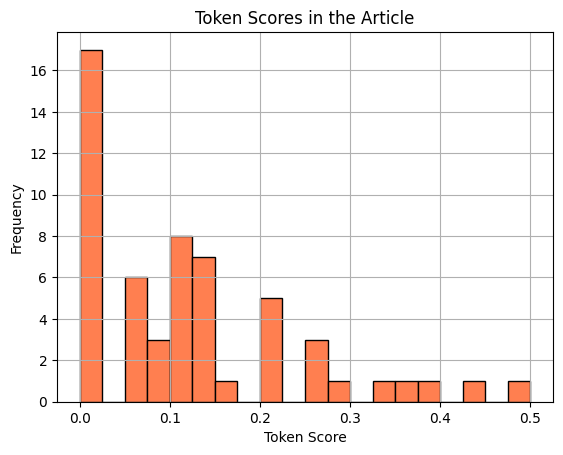

In [8]:
# for histogram
import matplotlib.pyplot as plt

# score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    
    # Extract
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count 
    interesting_token_count = sum(1 for token in tokens if token in interesting_tokens)
    
    # Calculate 
    score = interesting_token_count / len(tokens) if len(tokens) > 0 else 0
    return score

# Get the sentences from the article
doc = nlp(article_text)

# List to store the token scores of each sentence
token_scores = []

# Loop through each sentence in the article and calculate the token score
for sent in doc.sents:
    score = score_sentence_by_token(sent.text, interesting_tokens)
    token_scores.append(score)

# Plot the histogram of the token scores

plt.hist(token_scores, bins=20, color='coral', edgecolor='black')
plt.title('Token Scores in the Article')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Most common range seems to be from 0.0 to 0.15

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

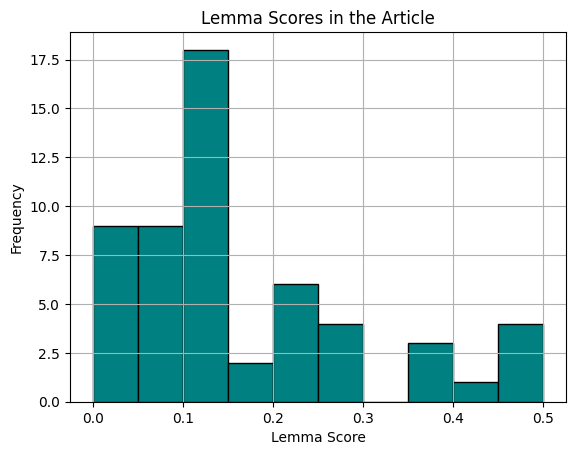

In [9]:
# for histogram
import matplotlib.pyplot as plt


# Method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    
    # Extract 
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count 
    interesting_lemma_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Calculate
    score = interesting_lemma_count / len(lemmas) if len(lemmas) > 0 else 0
    return score

# Get the sentences from the article
doc = nlp(article_text)

# List to store the lemma scores of each sentence
lemma_scores = []

# Loop through each sentence in the article and calculate the lemma score
for sent in doc.sents:
    score = score_sentence_by_lemma(sent.text, interesting_lemmas)
    lemma_scores.append(score)

# Plot the histogram of the lemma scores
plt.hist(lemma_scores, bins=10, color='teal', edgecolor='black')
plt.title('Lemma Scores in the Article')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Most common range is 0.0 to 0.15

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

# *Question 8*

If we only wanted to consider nouns as interesting words, verbs and adjectives would be ommited. 

For Tokens:
tokens = [token.text.lower() for token in doc if (token.pos_ in ['NOUN']) and not token.is_stop and not token.is_punct and not token.is_space]

For Lemmas:
lemmas = [token.lemma_.lower() for token in doc if (token.pos_ in ['NOUN']) and not token.is_stop and not token.is_punct and not token.is_space]

Below I ran the code to see if they did what was expected and I believe the results are correct. 

In [10]:
# For Tokens- filter nouns
nouns= [token.text.lower() for token in doc if (token.pos_ in ['NOUN']) and not token.is_stop and not token.is_punct and not token.is_space]

# Count
noun_count = Counter(nouns)

# Top 5 
most_frequent_noun = noun_count.most_common(5)

#Print
print("Token-Top 5 Nouns:")
for noun, freq in most_frequent_noun: 
    print(f"Noun: {noun}, Frequency: {freq}")

Token-Top 5 Nouns:
Noun: laser, Frequency: 29
Noun: headlights, Frequency: 17
Noun: technology, Frequency: 10
Noun: headlight, Frequency: 9
Noun: beam, Frequency: 7


In [11]:
# For Lemmas- filter nouns
nouns= [token.lemma_.lower() for token in doc if (token.pos_ in ['NOUN']) and not token.is_stop and not token.is_punct and not token.is_space]

# Count
noun_count = Counter(nouns)

# Top 5 
most_frequent_noun = noun_count.most_common(5)

#Print
print("Lemmas-Top 5 Nouns:")
for noun, freq in most_frequent_noun: 
    print(f"Noun: {noun}, Frequency: {freq}")

Lemmas-Top 5 Nouns:
Noun: laser, Frequency: 34
Noun: headlight, Frequency: 26
Noun: beam, Frequency: 12
Noun: technology, Frequency: 10
Noun: led, Frequency: 8


In [12]:
import os
os.system('jupyter nbconvert --to html web-scraping.ipynb')

0